# Read Granules

In [1]:
import starepandas
import netCDF4
import matplotlib.pyplot as plt
import numpy
import pandas
import time
import copy
import geopandas

import pandas_bokeh
pandas_bokeh.output_notebook()

Loading BokehJS ...

## Manually reading 

In [2]:
vnp03_name = '../tests/data/granules/VNP03DNB.A2020219.0742.001.2020219124651.nc'
vnp03 = starepandas.io.granules.VNP03DNB(vnp03_name)
vnp03.read_latlon()
vnp03.read_data()
vnp03 = vnp03.to_df(xy=True)

## MOD05

In [3]:
fname = '../tests/data/granules/MOD05_L2.A2019336.0000.061.2019336211522.hdf'
mod05 = starepandas.read_granule(fname, sidecar=True, latlon=True, xy=True)
sids = mod05.to_array(mod05._sid_column_name)
mod05.to_sidecar('test.nc')

In [4]:
geom = geopandas.points_from_xy(mod05.lon, mod05.lat)
trixels = mod05.make_trixels(n_workers=6)
mod05.set_trixels(trixels, inplace=True)
mod05.set_geometry(geom, inplace=True)
mod05 = mod05.set_crs(4326)

In [8]:
mod05[0:10000].plot_bokeh(hovertool_columns=['lon', 'lat'])
#mod05.plot_bokeh()

Figure(id='1423', ...)

## VNP02

In [5]:
vnp02_name = '../tests/data/granules/VNP02DNB.A2020219.0742.001.2020219125654.nc'
vnp02 = starepandas.read_granule(vnp02_name, sidecar=False, latlon=False)

In [21]:
vnp02 = vnp03.join(vnp02)

In [22]:
vnp02[(vnp02.land_water_mask==2) | (vnp02.land_water_mask==4) | (vnp02.land_water_mask==6) | (vnp02.land_water_mask==7)]

,lat,lon,x,y,moon_illumination_fraction,land_water_mask,quality_flag,DNB_observations,DNB_quality_flags
267,41.680256,-102.596710,0,267,92.790001,2,0,3.503916e-09,16
368,41.663277,-101.661072,0,368,92.799995,2,0,6.539059e-09,16
369,41.663055,-101.652069,0,369,92.799995,2,0,7.083299e-09,16
403,41.654938,-101.342972,0,403,92.799995,2,0,8.231430e-09,16
883,41.460007,-96.951828,0,883,92.820000,2,0,2.414932e-09,16
...,...,...,...,...,...,...,...,...,...
13134843,16.577330,-78.576134,3231,4059,92.879997,7,0,2.087984e-09,0
13134844,16.575632,-78.569000,3231,4060,92.879997,7,0,1.579183e-09,0
13134845,16.573931,-78.561844,3231,4061,92.879997,7,0,1.579183e-09,0
13134846,16.572226,-78.554688,3231,4062,92.879997,7,0,2.393264e-09,0


## VNP CLDMSK

In [12]:
cldmsk_name = '../tests/data/granules/CLDMSK_L2_VIIRS_SNPP.A2020219.0742.001.2020219190616.nc'

In [13]:
cldmsk = starepandas.io.granules.CLDMSKL2VIIRS(cldmsk_name)

In [14]:
cldmsk.read_latlon()
cldmsk.read_data()
cldmsk.to_df()

,lat,lon,Integer_Cloud_Mask
0,41.747662,-104.969498,3
1,41.747696,-104.950218,3
2,41.747730,-104.930237,3
3,41.747761,-104.910843,3
4,41.747784,-104.891747,3
...,...,...,...
10342395,16.522247,-78.595093,2
10342396,16.518646,-78.580162,1
10342397,16.515034,-78.565208,0
10342398,16.511414,-78.550224,1


## Plotting

In [12]:
path = '../tests/data/granules/VNP03DNB.A2020219.0742.001.2020219124651.nc'
vnp03dnb = starepandas.io.granules.VIIRSL2(path)
vnp03dnb.read_latlon()

path = '../tests/data/granules/VNP03MOD.A2020219.0742.001.2020219124651.nc'
vnp03mod = starepandas.io.granules.VIIRSL2(path)
vnp03mod.read_latlon()

path = '../tests/data/granules/CLDMSK_L2_VIIRS_SNPP.A2020219.0742.001.2020219190616.nc'
cldmsk = starepandas.io.granules.VIIRSL2(path)
cldmsk.read_latlon()

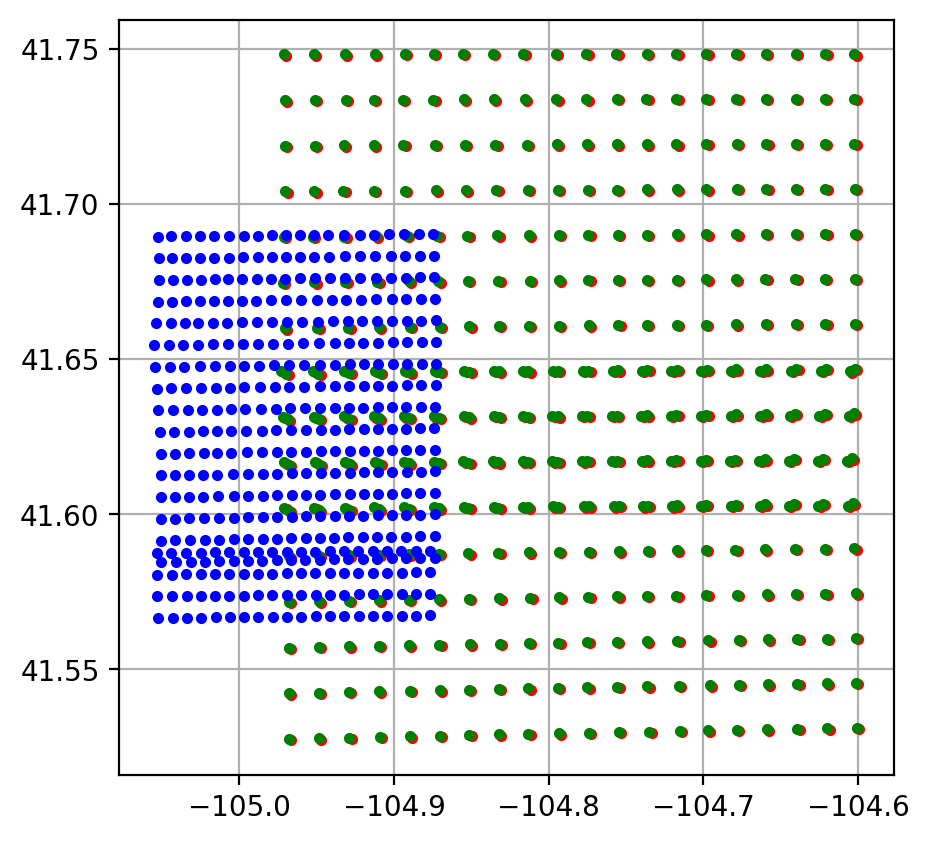

In [14]:
fig, ax = plt.subplots(figsize=(5,5), dpi=200)

n = 20
ns = 0
nt = 0

ax.grid('on')

ax.plot(cldmsk.lon[ns:ns+n, nt:nt+n].flatten(), cldmsk.lat[ns:ns+n, nt:nt+n].flatten(), 
        color='r', lw=0, marker='.')

ax.plot(vnp03mod.lon[ns:ns+n, nt:nt+n].flatten(), vnp03mod.lat[ns:ns+n, nt:nt+n].flatten(), 
        color='g',lw=0, marker='.')

ax.plot(vnp03dnb.lon[ns:ns+n, nt:nt+n].flatten(), vnp03dnb.lat[ns:ns+n, nt:nt+n].flatten(), 
        color='b',lw=0, marker='.')